In [38]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report, confusion_matrix
import cv2

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D
from keras.datasets import cifar10

In [39]:
(xtrain,ytrain), (xtest,ytest) = cifar10.load_data()

In [40]:
bird = (ytrain == 2).ravel()
deer = (ytrain == 4).ravel()

xtrain = np.concatenate((xtrain[bird,:,:,:],xtrain[deer,:,:,:]))

bird = (ytest == 2).ravel()
deer = (ytest == 4).ravel()

xtest = np.concatenate((xtest[bird,:,:,:],xtest[deer,:,:,:]))

In [41]:
ytrain = np.ones(10000)
ytrain[0:5000] = ytrain[0:5000]*0
I = np.random.permutation(10000) 

xtrain = xtrain[I,:,:,:]
ytrain = ytrain[I]

ytest = np.ones(2000)
ytest[0:1000] = ytest[0:1000]*0
I = np.random.permutation(2000) 

xtest = xtest[I,:,:,:]
ytest = ytest[I]

In [42]:
xtrain = xtrain.astype('float32')/255
xtest = xtest.astype('float32')/255

xtrain = xtrain.reshape(xtrain.shape[0],32,32,3)
xtest = xtest.reshape(xtest.shape[0],32,32,3)

In [48]:
model = Sequential()

#Primera capa
model.add(Conv2D(256,kernel_size=(3,3),padding='same',activation='relu',input_shape=(32,32,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
#Segunda capa
model.add(Conv2D(128,kernel_size=(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
#Tercera capa
model.add(Conv2D(64,kernel_size=(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
#Cuarta capa
model.add(Conv2D(32,kernel_size=(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
#Realizamos un flatten
model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(64,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(32,activation='relu'))
model.add(Dropout(0.2))

#Ultima capa de clasificacion
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [49]:
hist = model.fit(xtrain,ytrain,batch_size=32,epochs=60,verbose=1,validation_data=(xtest,ytest))

Epoch 1/60
313/313 [==============================] - 163s 515ms/step - loss: 0.6949 - accuracy: 0.5072 - val_loss: 0.6918 - val_accuracy: 0.5085
Epoch 2/60
313/313 [==============================] - 158s 505ms/step - loss: 0.6913 - accuracy: 0.5295 - val_loss: 0.6722 - val_accuracy: 0.6170
Epoch 3/60
313/313 [==============================] - 160s 512ms/step - loss: 0.6683 - accuracy: 0.5892 - val_loss: 0.6317 - val_accuracy: 0.6310
Epoch 4/60
313/313 [==============================] - 159s 508ms/step - loss: 0.6238 - accuracy: 0.6483 - val_loss: 0.6057 - val_accuracy: 0.6865
Epoch 5/60
313/313 [==============================] - 157s 503ms/step - loss: 0.6088 - accuracy: 0.6588 - val_loss: 0.5869 - val_accuracy: 0.6920
Epoch 6/60
313/313 [==============================] - 157s 502ms/step - loss: 0.5902 - accuracy: 0.6753 - val_loss: 0.5750 - val_accuracy: 0.7040
Epoch 7/60
313/313 [==============================] - 157s 502ms/step - loss: 0.5814 - accuracy: 0.6905 - val_loss: 0.5529 -

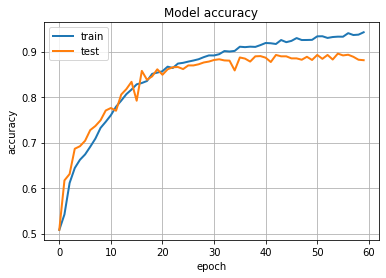

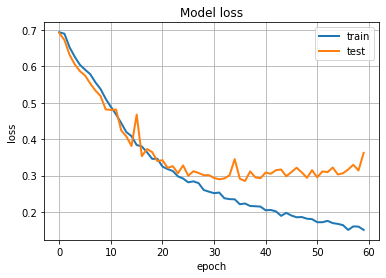

In [50]:
plt.figure()
plt.grid()
plt.plot(hist.history['accuracy'],lw=2)
plt.plot(hist.history['val_accuracy'],lw=2)
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='best')
plt.show()

plt.figure()
plt.grid()
plt.plot(hist.history['loss'],lw=2)
plt.plot(hist.history['val_loss'],lw=2)
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='best')
plt.show()

In [51]:
ypred = model.predict(xtest)
ypred = ypred.ravel()>0.5

print('\nMétricas: \n', classification_report(ytest,ypred));

print('Matriz de confusión: \n', confusion_matrix(ytest,ypred))


Métricas: 
               precision    recall  f1-score   support

         0.0       0.94      0.81      0.87      1000
         1.0       0.83      0.95      0.89      1000

    accuracy                           0.88      2000
   macro avg       0.89      0.88      0.88      2000
weighted avg       0.89      0.88      0.88      2000

Matriz de confusión: 
 [[812 188]
 [ 50 950]]


In [52]:
model.save('Model_cifar10_1.h5')

In [ ]:
model = keras.models.load_model('Model_cifar10_1.h5')

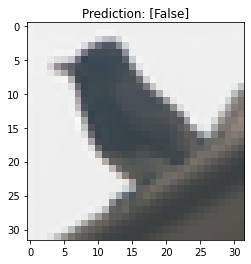

In [78]:
patron = xtest[np.random.randint(0,2000)].reshape(1,32,32,3)

number = model.predict(patron)
number = number.ravel()>0.5

plt.imshow(patron[0,:,:])
plt.title('Prediction: ' + str(number))
plt.show()

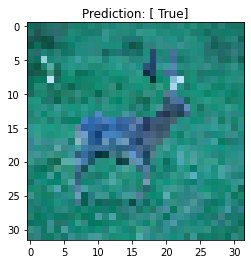

In [81]:
import cv2

img = cv2.imread('bird_1.jpg')
img = cv2.resize(img,(32,32))

patron = img.reshape(1,32,32,3)/255

number = model.predict(patron)
number = number.ravel()>0.5

plt.imshow(patron[0,:,:])
plt.title('Prediction: ' + str(number))
plt.show()